# Smoothing time series

> In statistics and image processing, to smooth a data set is to create an
approximating function that attempts to capture important patterns in the data,
while leaving out noise or other fine-scale structures/rapid phenomena.
(https://en.wikipedia.org/wiki/Smoothing)

In this notebook, we demonstrate the usage and results of different smoothing
transformations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from aeon.datasets import load_airline, load_solar

In [2]:
# Load time series example
x_airline = load_airline()
x_solar = load_solar()

In [3]:
# Generate random serie
np.random.seed(42)
x_random = np.random.random(128) * 10

# Generate sinus/cosinus signal with random noise
t1 = np.linspace(0, 64, 256)
t2 = np.linspace(0, 32, 256)
x_signal = np.sin(t1) + np.cos(t2) + (np.random.random(256) - 0.5)

In [4]:
# Plot functions


def plot_axes(axe, x1, x2, title):
    """Plot x1 and x2 on axe."""
    axe.plot(x1, label="Original Series", color="red")
    axe.plot(x2, label="Smoothed Series", color="blue")
    axe.set_title(title)
    axe.legend()


def plot_transformation(transformer=None):
    """Plot transformation for each ts."""
    fig, axes = plt.subplots(2, 2, figsize=(16, 8), dpi=75)

    plot_axes(
        axes[0, 0], x_airline, transformer.fit_transform(x_airline)[0], "x_airline"
    )
    plot_axes(axes[0, 1], x_solar, transformer.fit_transform(x_solar)[0], "x_solar")
    plot_axes(axes[1, 0], x_random, transformer.fit_transform(x_random)[0], "x_random")
    plot_axes(axes[1, 1], x_signal, transformer.fit_transform(x_signal)[0], "x_signal")

## GaussSeriesTransformer

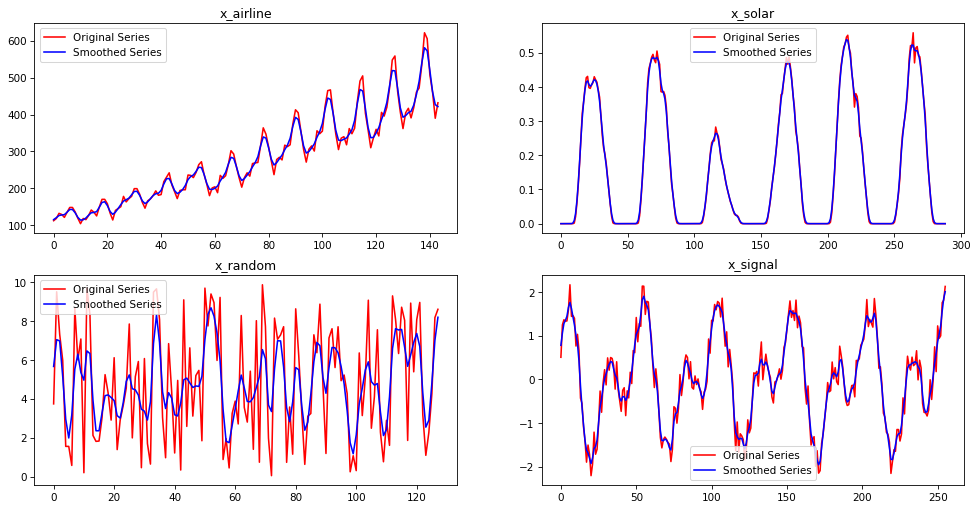

In [5]:
from aeon.transformations.series import GaussSeriesTransformer

t = GaussSeriesTransformer()
plot_transformation(t)

## DFTSeriesTransformer

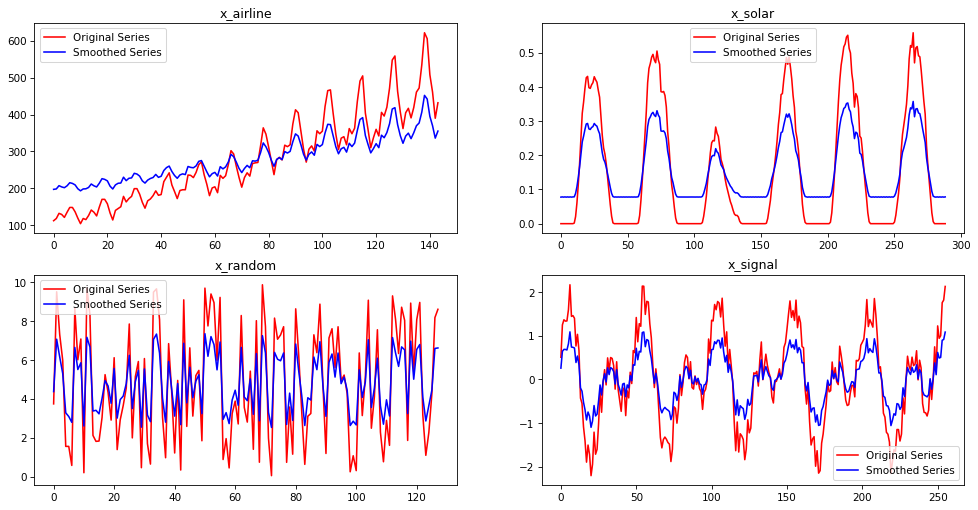

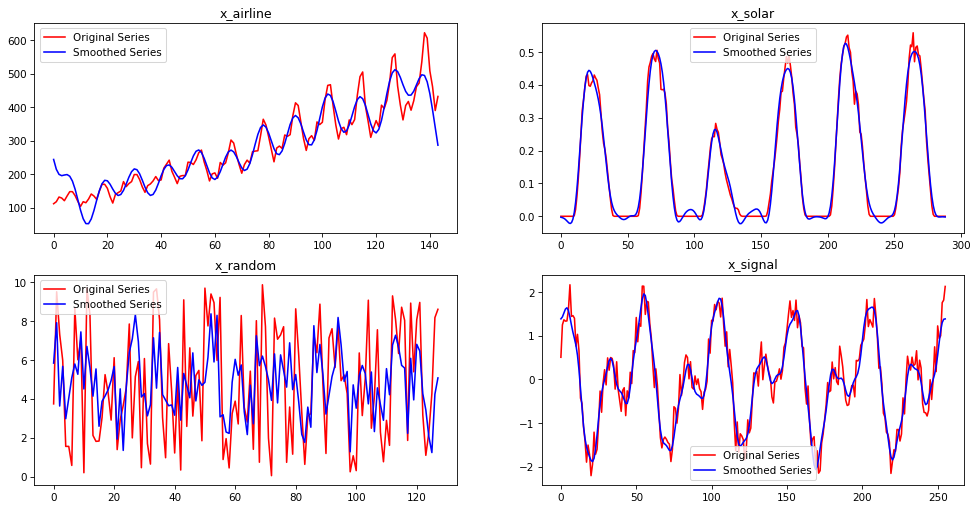

In [6]:
from aeon.transformations.series import DFTSeriesTransformer

t = DFTSeriesTransformer()
plot_transformation(t)

t = DFTSeriesTransformer(r=0.1, sort=True)
plot_transformation(t)

## SIVSeriesTransformer

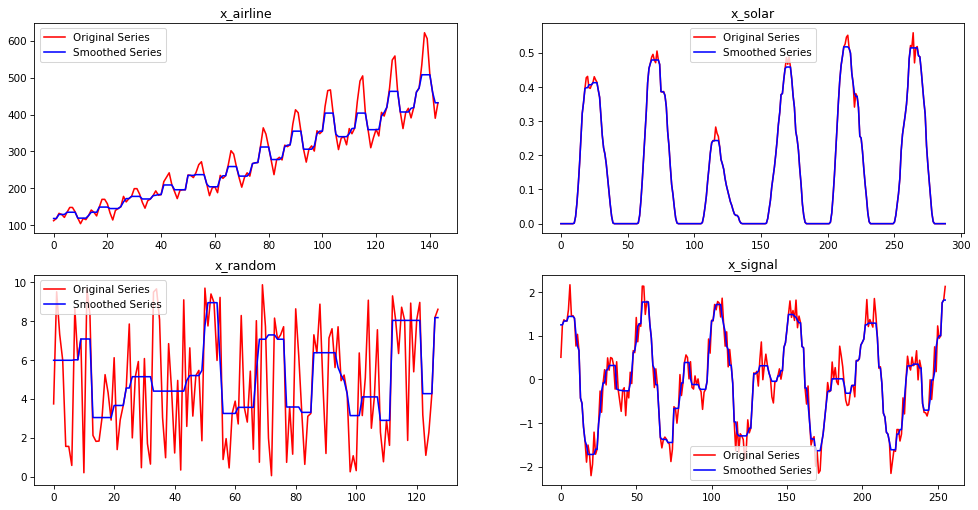

In [7]:
from aeon.transformations.series import SIVSeriesTransformer

t = SIVSeriesTransformer()
plot_transformation(t)

## SGSeriesTransformer

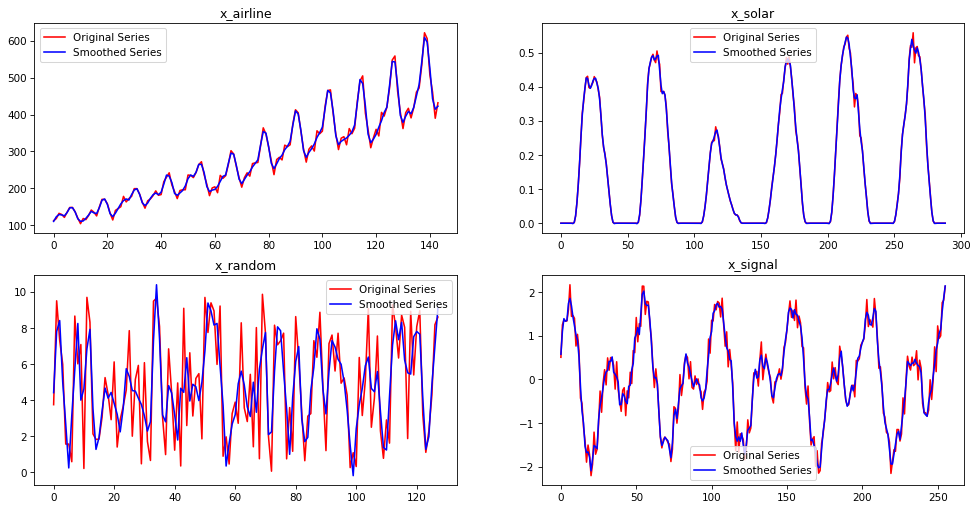

In [8]:
from aeon.transformations.series import SGSeriesTransformer

t = SGSeriesTransformer()
plot_transformation(t)

## MovingAverageSeriesTransformer

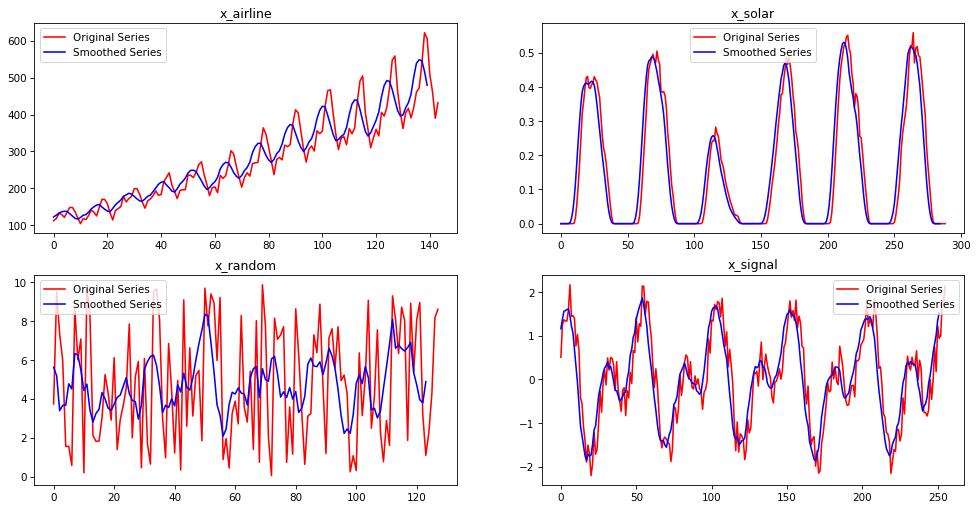

In [9]:
from aeon.transformations.series._moving_average import MovingAverageSeriesTransformer

t = MovingAverageSeriesTransformer()
plot_transformation(t)

## ExpSmoothingSeriesTransformer

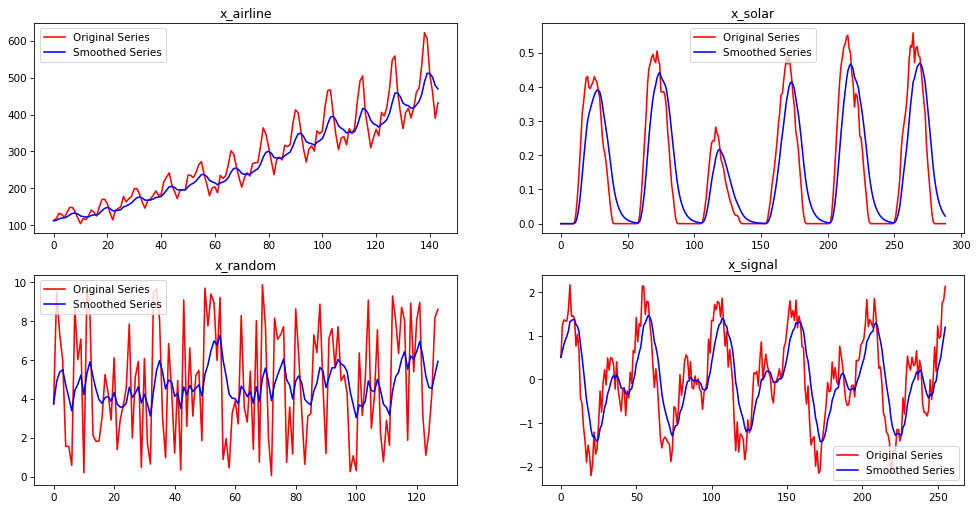

In [10]:
from aeon.transformations.series._exp_smoothing import ExpSmoothingSeriesTransformer

t = ExpSmoothingSeriesTransformer()
plot_transformation(t)